In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('/Dataset Section A1 Evaluation_The Egyptian Mummy - Sheet1.csv')
df

,gold,age,iron,silver,inEgypt,isAKing,real_price,black_market_price
0,78,5929,809,1439,1,0,11984.25,37886327
1,38,6144,538,803,0,0,7545.00,38684433
2,99,6811,682,1870,0,1,14388.75,50366546
3,60,5556,768,2159,1,0,15188.00,36125841
4,72,6106,641,2176,1,0,15149.50,42436277
...,...,...,...,...,...,...,...,...
993,53,6457,951,2583,1,1,18312.25,49278948
994,4,6083,742,2912,0,0,18346.75,46033213
995,5,6512,901,1972,1,1,14641.00,47113754
996,99,5894,556,158,1,0,5021.50,35085137


In [32]:
x1s=df['gold'].to_numpy()
x2s=df['age'].to_numpy()
x3s=df['iron'].to_numpy()
x4s=df['silver'].to_numpy()
x5s=df['inEgypt'].to_numpy()
x6s=df['isAKing'].to_numpy()

x1s.shape

(998,)

In [33]:
x1s=x1s.reshape(x1s.shape[0],1)
x2s=x2s.reshape(x2s.shape[0],1)
x3s=x3s.reshape(x3s.shape[0],1)
x4s=x4s.reshape(x4s.shape[0],1)
x5s=x5s.reshape(x5s.shape[0],1)
x6s=x6s.reshape(x6s.shape[0],1)

In [34]:
x1s.shape

(998, 1)

In [35]:
x=np.concatenate((x1s,x2s,x3s,x4s,x5s,x6s),axis=1)

In [37]:
x.shape

(998, 6)

In [4]:
y=df['real_price']
y

0      11984.25
1       7545.00
2      14388.75
3      15188.00
4      15149.50
         ...   
993    18312.25
994    18346.75
995    14641.00
996     5021.50
997     8260.75
Name: real_price, Length: 998, dtype: float64

In [5]:
print(x.shape)
print(y.shape)

(998, 6)
(998,)


In [38]:
import sklearn
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(x,y, test_size=0.20, random_state=42)

In [39]:
print(xTrain.shape)
print(yTrain.shape)
print(xTest.shape)
print(yTest.shape)

(798, 6)
(798,)
(200, 6)
(200,)


In [40]:
# importing the classes for building the neural network layers
from tensorflow.keras.layers import Dense,Input,Concatenate
import tensorflow as tf

In [41]:
initialiezer=tf.keras.initializers.RandomUniform(minval=0.0005, maxval=1, seed=100)

input= Input(shape=6) # can take 6 inputs at a time

# this technique is called functional API
x=Dense(units=1,use_bias=True,activation='relu',kernel_initializer=initialiezer,name="firstDenseLayer")(input)  # new dense layer created connected to input layer



In [42]:
from tensorflow.keras.models import Model

In [11]:
model=Model([input],[x]) 

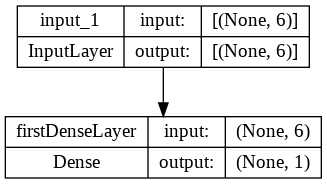

In [43]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [46]:
# configure the training
model.compile(loss='mse',metrics=['mse'],optimizer=tf.optimizers.Adam(learning_rate=0.005))

In [47]:
# train the model. just run a few epochs for this test run. you can adjust later.
history=model.fit(xTrain,yTrain,validation_data=(xTest,yTest),batch_size=128, epochs=20)

Epoch 1/20
7/7 [==============================] - 0s 23ms/step - loss: 7065969.5000 - mse: 7065969.5000 - val_loss: 6933492.5000 - val_mse: 6933492.5000
Epoch 2/20
7/7 [==============================] - 0s 6ms/step - loss: 6904331.5000 - mse: 6904331.5000 - val_loss: 6776672.5000 - val_mse: 6776672.5000
Epoch 3/20
7/7 [==============================] - 0s 6ms/step - loss: 6745255.0000 - mse: 6745255.0000 - val_loss: 6624004.5000 - val_mse: 6624004.5000
Epoch 4/20
7/7 [==============================] - 0s 6ms/step - loss: 6592598.5000 - mse: 6592598.5000 - val_loss: 6473395.0000 - val_mse: 6473395.0000
Epoch 5/20
7/7 [==============================] - 0s 6ms/step - loss: 6449225.0000 - mse: 6449225.0000 - val_loss: 6325933.0000 - val_mse: 6325933.0000
Epoch 6/20
7/7 [==============================] - 0s 6ms/step - loss: 6299926.0000 - mse: 6299926.0000 - val_loss: 6183548.0000 - val_mse: 6183548.0000
Epoch 7/20
7/7 [==============================] - 0s 6ms/step - loss: 6155595.0000 - ms

In [53]:
input=xTest[60].reshape(1,6)
ypred=model.predict(input)
ypred

1/1 [==============================] - 0s 14ms/step


array([[12248.456]], dtype=float32)

In [54]:
yTest[60]

9573.25

In [56]:
x1s=df['gold'].to_numpy()
x2s=df['age'].to_numpy()
x3s=df['iron'].to_numpy()
x4s=df['silver'].to_numpy()
x5s=df['inEgypt'].to_numpy()
x6s=df['isAKing'].to_numpy()

x1s=x1s.reshape(x1s.shape[0],1)
x2s=x2s.reshape(x2s.shape[0],1)
x3s=x3s.reshape(x3s.shape[0],1)
x4s=x4s.reshape(x4s.shape[0],1)
x5s=x5s.reshape(x5s.shape[0],1)
x6s=x6s.reshape(x6s.shape[0],1)

x=np.concatenate((x1s,x2s,x3s,x4s,x5s,x6s),axis=1)

In [57]:
y=df['black_market_price']
y

0      37886327
1      38684433
2      50366546
3      36125841
4      42436277
         ...   
993    49278948
994    46033213
995    47113754
996    35085137
997    27828111
Name: black_market_price, Length: 998, dtype: int64

In [58]:
import sklearn
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(x,y, test_size=0.20, random_state=42)

In [59]:
print(xTrain.shape)
print(yTrain.shape)
print(xTest.shape)
print(yTest.shape)

(798, 6)
(798,)
(200, 6)
(200,)


In [60]:
# configure the training
model.compile(loss='mse',metrics=['mse'],optimizer=tf.optimizers.Adam(learning_rate=0.005))

In [61]:
# train the model. just run a few epochs for this test run. you can adjust later.
history=model.fit(xTrain,yTrain,validation_data=(xTest,yTest),batch_size=128, epochs=20)

Epoch 1/20
7/7 [==============================] - 0s 22ms/step - loss: 1640376993579008.0000 - mse: 1640376993579008.0000 - val_loss: 1650757795315712.0000 - val_mse: 1650757795315712.0000
Epoch 2/20
7/7 [==============================] - 0s 6ms/step - loss: 1640353237041152.0000 - mse: 1640353237041152.0000 - val_loss: 1650734307213312.0000 - val_mse: 1650734307213312.0000
Epoch 3/20
7/7 [==============================] - 0s 6ms/step - loss: 1640329748938752.0000 - mse: 1640329748938752.0000 - val_loss: 1650710684893184.0000 - val_mse: 1650710684893184.0000
Epoch 4/20
7/7 [==============================] - 0s 6ms/step - loss: 1640306395054080.0000 - mse: 1640306395054080.0000 - val_loss: 1650687196790784.0000 - val_mse: 1650687196790784.0000
Epoch 5/20
7/7 [==============================] - 0s 5ms/step - loss: 1640282772733952.0000 - mse: 1640282772733952.0000 - val_loss: 1650663440252928.0000 - val_mse: 1650663440252928.0000
Epoch 6/20
7/7 [==============================] - 0s 5ms/st

In [62]:
input=xTest[60].reshape(1,6)
ypred=model.predict(input)
ypred

1/1 [==============================] - 0s 31ms/step


array([[17801.6]], dtype=float32)

In [63]:
yTest[60]

39571983

In [64]:
# Getting the data out as numpy arrays
x1s=df['gold'].to_numpy()
x2s=df['age'].to_numpy()
x3s=df['iron'].to_numpy()
x4s=df['silver'].to_numpy()
x5s=df['inEgypt'].to_numpy()
x6s=df['isAKing'].to_numpy()

In [65]:
print(x1s.shape)
print(x2s.shape)
print(x3s.shape)
print(x4s.shape)
print(x5s.shape)
print(x6s.shape)

(998,)
(998,)
(998,)
(998,)
(998,)
(998,)


In [66]:
x1s=x1s.reshape(x1s.shape[0],1)
x2s=x2s.reshape(x2s.shape[0],1)
x3s=x3s.reshape(x3s.shape[0],1)
x4s=x4s.reshape(x4s.shape[0],1)
x5s=x5s.reshape(x5s.shape[0],1)
x6s=x6s.reshape(x6s.shape[0],1)

In [67]:
print(x1s.shape)
print(x2s.shape)
print(x3s.shape)
print(x4s.shape)
print(x5s.shape)
print(x6s.shape)

(998, 1)
(998, 1)
(998, 1)
(998, 1)
(998, 1)
(998, 1)


In [68]:
y1s=df['real_price'].to_numpy()
y2s=df['black_market_price'].to_numpy()

In [69]:
print(y1s.shape)
print(y2s.shape)

(998,)
(998,)


In [87]:
y1s=y1s.reshape(y1s.shape[0],1)
y2s=y2s.reshape(y2s.shape[0],1)


In [71]:
print(y1s.shape)
print(y2s.shape)

(998, 1)
(998, 1)


In [93]:
initialiezer=tf.keras.initializers.RandomUniform(minval=0.0005, maxval=1, seed=100)

input1= Input(shape=1)
input2= Input(shape=1)
input3= Input(shape=1)
input4= Input(shape=1)
input5= Input(shape=1)
input6= Input(shape=1)

l1=Dense(units=10,use_bias=True,activation='relu',kernel_initializer=initialiezer)(input1)
l1=Dense(units=10,use_bias=True,activation='relu',kernel_initializer=initialiezer)(l1)

l2=Dense(units=10,use_bias=True,activation='relu',kernel_initializer=initialiezer)(input2)
l2=Dense(units=10,use_bias=True,activation='relu',kernel_initializer=initialiezer)(l2)

l3=Dense(units=10,use_bias=True,activation='relu',kernel_initializer=initialiezer)(input3)
l3=Dense(units=10,use_bias=True,activation='relu',kernel_initializer=initialiezer)(l3)

l4=Dense(units=10,use_bias=True,activation='relu',kernel_initializer=initialiezer)(input4)
l4=Dense(units=10,use_bias=True,activation='relu',kernel_initializer=initialiezer)(l4)

l5=Dense(units=10,use_bias=True,activation='relu',kernel_initializer=initialiezer)(input5)
l5=Dense(units=10,use_bias=True,activation='relu',kernel_initializer=initialiezer)(l5)

l6=Dense(units=10,use_bias=True,activation='relu',kernel_initializer=initialiezer)(input6)
l6=Dense(units=10,use_bias=True,activation='relu',kernel_initializer=initialiezer)(l6)

concatted = Concatenate()([l1, l2, l3, l4, l5, l6])

denseCombined1=Dense(units=10,use_bias=True,activation='relu',kernel_initializer=initialiezer)(concatted) 
denseCombined2=Dense(units=5,use_bias=True,activation='relu',kernel_initializer=initialiezer)(concatted) 

denseFinal1=Dense(units=5,use_bias=True,activation='relu',kernel_initializer=initialiezer)(denseCombined1) 
denseFinal2=Dense(units=5,use_bias=True,activation='relu',kernel_initializer=initialiezer)(denseCombined2) 


In [94]:
import sklearn
from sklearn.model_selection import train_test_split
x1Train, x1Test, x2Train, x2Test,x3Train, x3Test, x4Train, x4Test,x5Train, x5Test, x6Train, x6Test, y1Train, y1Test,y2Train,y2Test = train_test_split(x1s,x2s,x3s,x4s,x5s,x6s,y1s,y2s, test_size=0.20, random_state=42)

In [95]:
print(f'the shape of x1Train = {x1Train.shape}')
print(f'the shape of x1Test = {x1Test.shape}')

print(f'the shape of x2Train = {x2Train.shape}')
print(f'the shape of x2Test = {x2Test.shape}')

print(f'the shape of yTrain = {y1Train.shape}')
print(f'the shape of yTest = {y1Test.shape}')

the shape of x1Train = (798, 1)
the shape of x1Test = (200, 1)
the shape of x2Train = (798, 1)
the shape of x2Test = (200, 1)
the shape of yTrain = (798, 1)
the shape of yTest = (200, 1)


In [96]:
model=Model([input1,input2,input3,input4,input5,input6],[denseFinal1,denseFinal2]) 

In [97]:
# configure the training
model.compile(loss='mse',metrics=['mse'],optimizer=tf.optimizers.Adam(learning_rate=0.005))

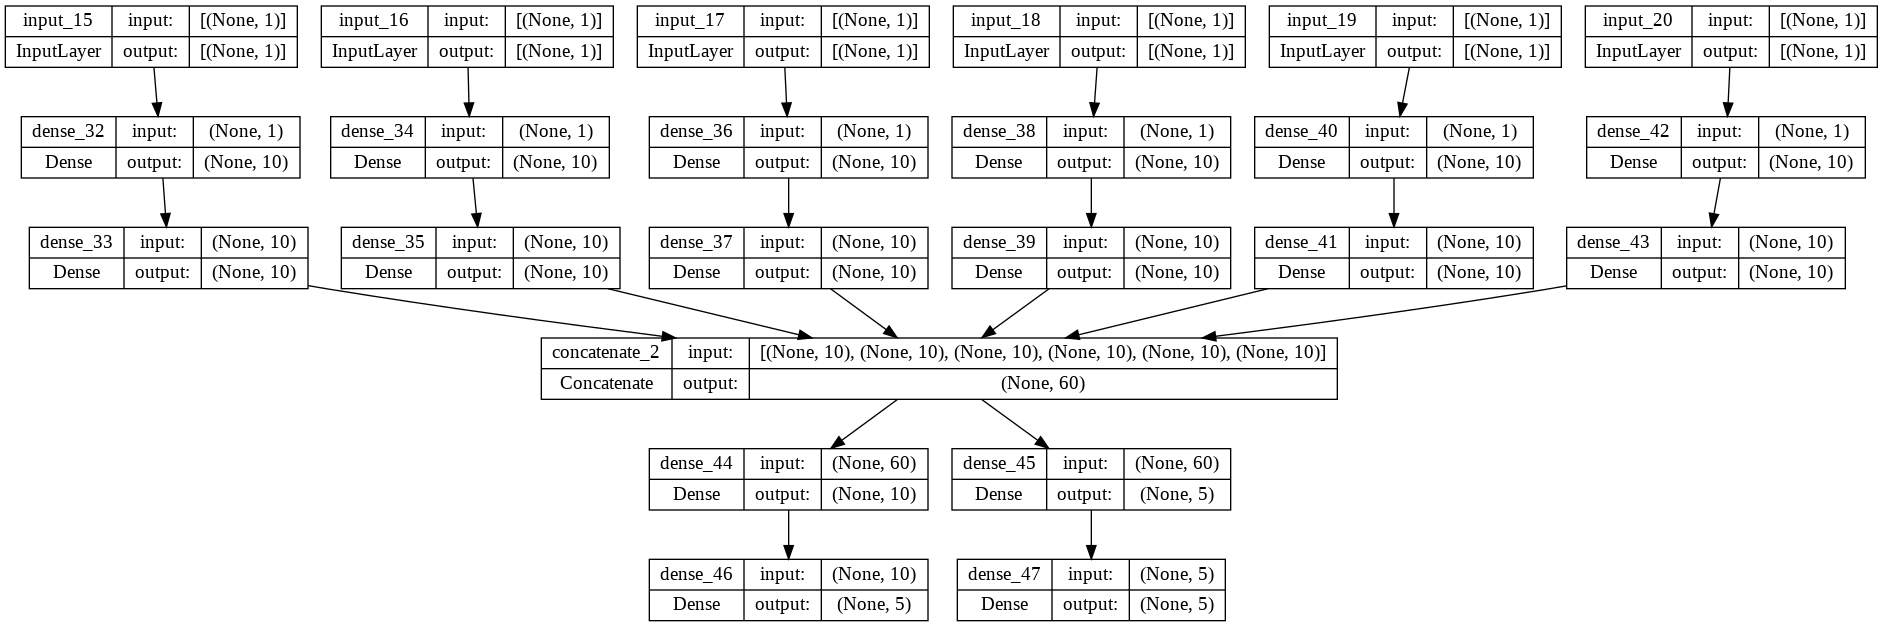

In [98]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [99]:
history=model.fit(x=[x1Train,x2Train,x3Train,x4Train,x5Train,x6Train],y=[y1Train,y2Train],validation_data=([x1Test,x2Test,x3Test,x4Test,x5Test,x6Test],[y1Test,y2Test]),batch_size=64, epochs=30)

Epoch 1/30
13/13 [==============================] - 1s 31ms/step - loss: 1614070318891008.0000 - dense_46_loss: 272883728384.0000 - dense_47_loss: 1613797320032256.0000 - dense_46_mse: 272883728384.0000 - dense_47_mse: 1613797320032256.0000 - val_loss: 1616076471271424.0000 - val_dense_46_loss: 262553239552.0000 - val_dense_47_loss: 1615813941395456.0000 - val_dense_46_mse: 262553239552.0000 - val_dense_47_mse: 1615813941395456.0000
Epoch 2/30
13/13 [==============================] - 0s 9ms/step - loss: 1597409201225728.0000 - dense_46_loss: 244354514944.0000 - dense_47_loss: 1597164924960768.0000 - dense_46_mse: 244354514944.0000 - dense_47_mse: 1597164924960768.0000 - val_loss: 1594990329331712.0000 - val_dense_46_loss: 219947778048.0000 - val_dense_47_loss: 1594770480693248.0000 - val_dense_46_mse: 219947778048.0000 - val_dense_47_mse: 1594770480693248.0000
Epoch 3/30
13/13 [==============================] - 0s 8ms/step - loss: 1571882734190592.0000 - dense_46_loss: 194813034496.000

In [100]:
input=[x1Test[60],x2Test[60],x3Test[60],x4Test[60],x5Test[60],x6Test[60]]
output=model.predict(input)
output

1/1 [==============================] - 0s 137ms/step


[array([[ 7466.6943,     0.    , 12094.46  , 13079.808 ,     0.    ]],
       dtype=float32),
 array([[37617928., 37580508., 37611808., 37600664., 37607488.]],
       dtype=float32)]

In [102]:
y1Test[60]

array([13944.75])

In [103]:
y2Test[60]

array([31112331])